1.  	Dataset yang digunakan untuk mengklasifikasi gambar apa ?
Jawab : Klasifikasi gambar tingkat kematangan buah pisang, seperti gambar pisang mentah, pisang matang , dan pisang busuk
2.  	Sebutkan jumlah image pada masing – masing kelas ?
Jawab : 240 Image
3.  	Dataset dibagi menjadi berapa Folder dan berapa jumlah masing -  masing ?
Jawab : 80 Image per Folder
4.  	Berapa Batch size yang digunakan ?
Jawab : 62
5.  	Image dataset diubah menjadi ukuran berapa sebelum dilakukan convolution ?
Jawab : 150 150
6.  	Berapa jumlah iterasi yang digunakan ?
Jawab : 50
7.  	sebutkan augmentasi apa saja yang dilakukan dalam pipeline source code yang anda kerjakan ?
Jawab : zoom, rescale, geser, width_shift_range, dan height_shift_range
8.  	sebutkam model layer yang digunakan pada tugas anda ?
Jawab : Conv2D,Drop Out, Batch Normalization dan MaxPooling2D
9.  	optimizer yang digunakan pada tugas anda ?
Jawab : Adam
10.   Berapa total parameter yang digunakan dan parameter yang ditrain ?
Jawab : 5 Parameter
11.   Sebutkan accuracy dan loss pada epoch terakhir ?
Jawab : 0.8800
12.   Sebutkan accuracy yang tertinggi dan epoch ke berapa ?
Jawab : 0.8800, epoch ke 50
13.   Apakah prediksi gambar yang dilakukan sudah benar ?
Jawab : Benar

**Eksperimen**
-        No 1
-        80% train : 10% val : 10% test,  => 0.7500
-        70% train : 15% val : 15% test, => 0.40
-        80% train : 20% val, => 0.9200
-        70% train : 30% => 0.3400

-        No 2 Augmentasi Data => Rotasi dan Horizontal Flip => 0.5500

-        No 3 Batch Size
-           - Batch Size = 20(0.8700)
-           - Batch Size = 50(0.1700)

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"herutriana","key":"2c1f797ca47ea0ac874fea831a498631"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d irenepalebangan/deeplearningtim16miga

 93% 41.0M/43.9M [00:01<00:00, 33.5MB/s]
100% 43.9M/43.9M [00:01<00:00, 28.4MB/s]


In [ ]:
import zipfile,os
zip_lcl = '/content/deeplearningtim16miga.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/content')
rzip.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
train_dataset_path = '/content/IMAGE CLASSIFICATION LANGIT/TRAIN'
validation_dataset_path = '/content/IMAGE CLASSIFICATION LANGIT/VALIDATION'

In [ ]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 50

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                   rotation_range=20,
                                horizontal_flip=True,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 240 images belonging to 3 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 30 images belonging to 3 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : LANGIT CERAH
1 : LANGIT MENDUNG
2 : SUNSET


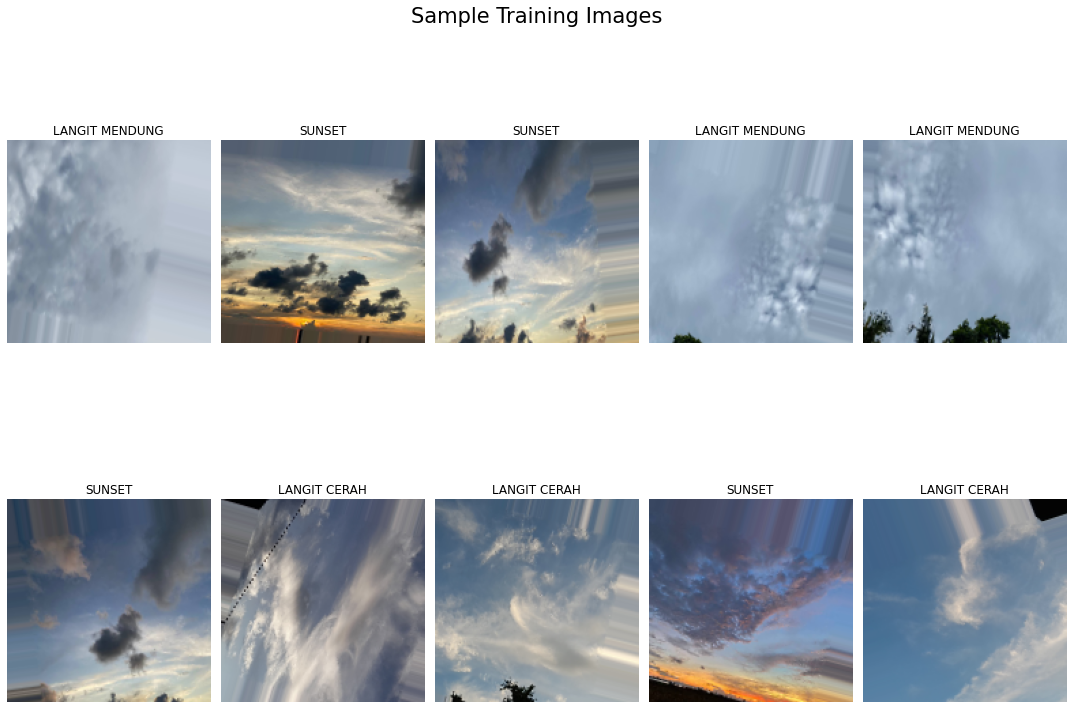

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=3, activation='softmax')
    ])

    return model

In [ ]:
cnn_model = create_model()

In [ ]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     9728      
                                                                 
 activation (Activation)     (None, 146, 146, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 73, 73, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 71, 71, 64)        0

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [ ]:
optimizer = Adam(learning_rate=0.001)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.92):
      print("\nAkurasi di atas 90%, hentikan training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
callbacks = [
    ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True),
    #ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5),
    myCallback()
]

In [ ]:
cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(train_generator, epochs=50, validation_data=validation_generator,
                       verbose=2, callbacks = [callbacks])

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to model.hdf5
5/5 - 49s - loss: 1.5060 - accuracy: 0.7250 - val_loss: 2.6434 - val_accuracy: 0.3333 - 49s/epoch - 10s/step
Epoch 2/50

Epoch 2: val_accuracy did not improve from 0.33333
5/5 - 44s - loss: 0.7070 - accuracy: 0.9042 - val_loss: 2.8254 - val_accuracy: 0.3333 - 44s/epoch - 9s/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.33333 to 0.63333, saving model to model.hdf5
5/5 - 44s - loss: 0.1473 - accuracy: 0.9542 - val_loss: 2.3620 - val_accuracy: 0.6333 - 44s/epoch - 9s/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.63333
5/5 - 44s - loss: 0.2797 - accuracy: 0.9583 - val_loss: 2.9135 - val_accuracy: 0.3333 - 44s/epoch - 9s/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.63333
5/5 - 44s - loss: 0.2064 - accuracy: 0.9667 - val_loss: 2.2306 - val_accuracy: 0.3000 - 44s/epoch - 9s/step
Epoch 6/50

Epoch 6: val_accuracy did not improve from 0.63333
5/5 - 44s - loss: 0.

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

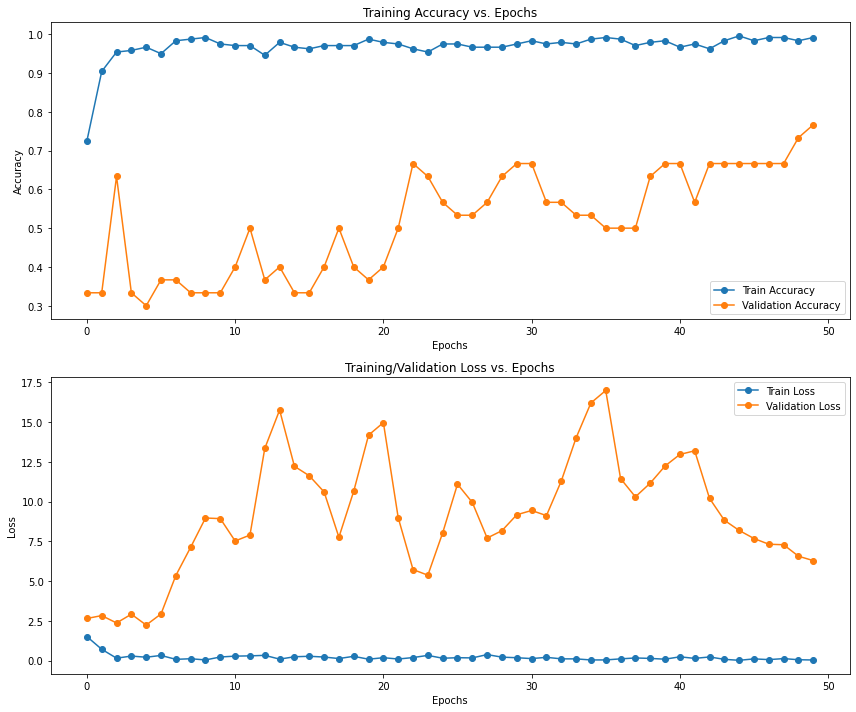

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
test_dataset = '/content/IMAGE CLASSIFICATION LANGIT/TEST'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 30 images belonging to 3 classes.


In [ ]:
predictions = cnn_model.predict(test_generator)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

1/1 [==============================] - 3s 3s/step - loss: 6.2834 - accuracy: 0.7667


In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     6.28342342376709
Test Accuracy: 0.7666666507720947


In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

                precision    recall  f1-score   support

  LANGIT CERAH       0.77      1.00      0.87        10
LANGIT MENDUNG       0.71      1.00      0.83        10
        SUNSET       1.00      0.30      0.46        10

      accuracy                           0.77        30
     macro avg       0.83      0.77      0.72        30
  weighted avg       0.83      0.77      0.72        30



In [ ]:
model.save('model.hdf5')